## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file into a panda dataframe

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

## Before we begin linear regression, we must pre-process the data to make it more suitable for the regression model to work on 
### Using correlation matrix to drop irrelevant and highly correlated features

{'symboling', 'peakrpm', 'stroke', 'compressionratio'}
{'highwaympg'}


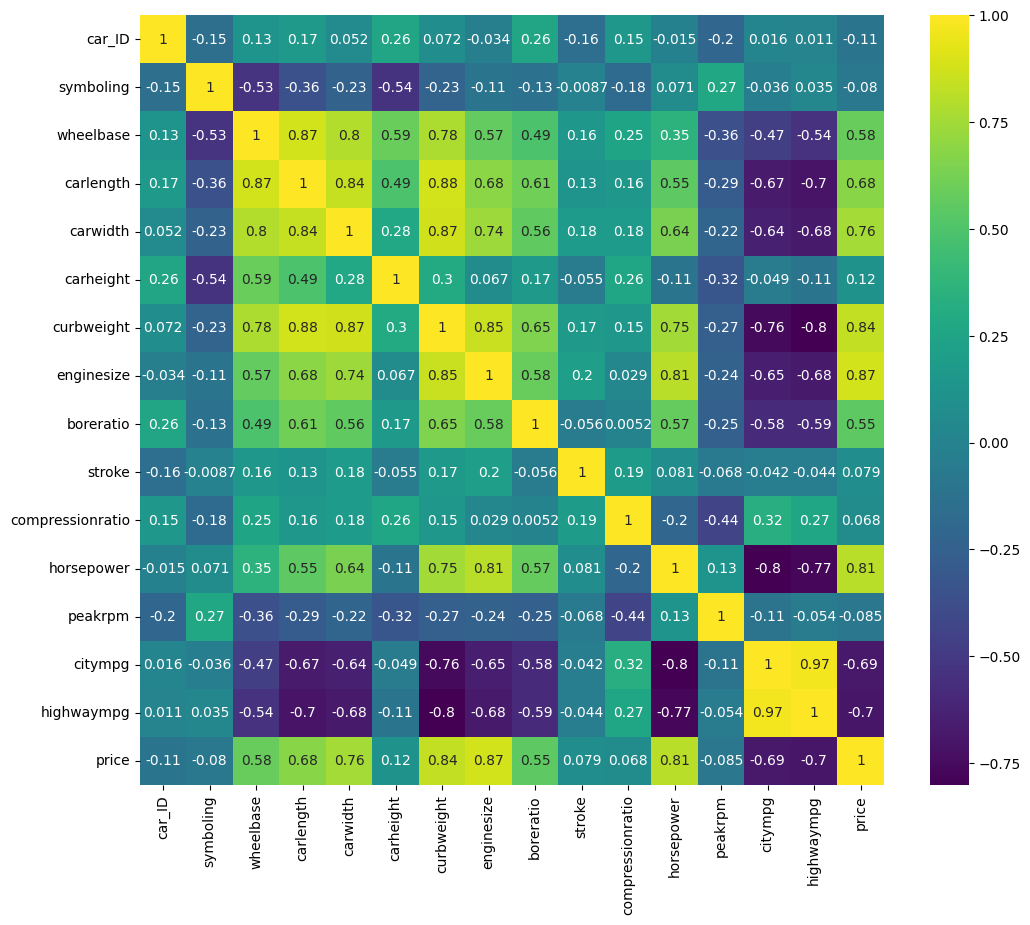

In [3]:
data_num = data.select_dtypes(include=['number'])
plt.figure(figsize=(12,10))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap = 'viridis')
def correlationfeattofeat(dataset, threshold = 0.9):
    column_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                column_cor.add(colname)
    return column_cor
def correlationfeattotarget(dataset, threshold = 0.1):
    column_cor = set()
    corr_matrix = dataset.corr()
    for col in corr_matrix.columns:
        if abs(corr_matrix.loc['price', col]) < threshold:
            column_cor.add(col)
    return column_cor

corr_features_irrelevant = correlationfeattotarget(data_num)
print(corr_features_irrelevant)
corr_features_correlating = correlationfeattofeat(data_num)
print(corr_features_correlating)
data_num_proc1 = data_num.drop(corr_features_irrelevant, axis=1)
data_num_proc2 = data_num_proc1.drop(corr_features_correlating, axis=1)



### Performing encoding with categorical data, standardization with numerical data

In [4]:
data_num_proc3 = data_num_proc2.drop(['price','car_ID' ], axis=1)  # replace 'target_variable' with your actual target variable
y = data['price']
data_cat =data.select_dtypes(include=['object'])  
mean = data_num_proc3.mean(axis=0)
std = data_num_proc3.std(axis=0)
data_num_norm = (data_num_proc3 - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 

### Splitting given data into a dataset for training and another for testing

In [5]:

test_size = 0.3

n_samples = data_proc.shape[0]

n_test_samples = int(n_samples * test_size)
print(n_test_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]


X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
mse_values = []

61


## Performing Linear Regression
### Creating a class LinearRegression, setting its properties and defining its functions

In [6]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 600):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_mse = float('inf')
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            mse = np.mean((y_predicted - y) ** 2)
            mse_values.append(mse)
            if i > 0:
                if prev_mse - mse < 1e3:
                    break
            prev_mse = mse
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

### Creating Object to run linear regression on data

[ 5845.27867856  8723.9661354  18654.03076237 11815.27382042
 16460.16179844 23276.16867642  7136.36269903 23982.84986287
 10515.51766712  5862.31162472  4867.03203625 14044.11483207
 31413.14145551 17013.38024292  7225.2503768  19654.00187615
  5686.59523154 29632.88257679 10540.40287357 34138.24466855
  9741.27701243 20833.64636945 10366.48563937 19381.01460772
 31413.14145551  7978.86172897 28423.65528762 16560.73135392
 18664.17966171  9321.12658956 21399.70039951  8849.07508495
  8828.41849434 11851.86556306  5832.57729677 -2868.3728537
 11779.90937585  7395.52451064 17366.33390723  9791.72681777
  5940.72596241 15613.87539703 10422.2303296  19815.720172
  5913.02171668 15868.31072794  6558.96513083 18841.94865167
  5216.44477866  8946.94723415 10145.9958812   7411.31674327
  7114.95784167  6145.9681825   9359.39003218 11054.10838556
  6078.41430168 14797.96762654  6207.63823246  5130.58714798
  6429.30782023]


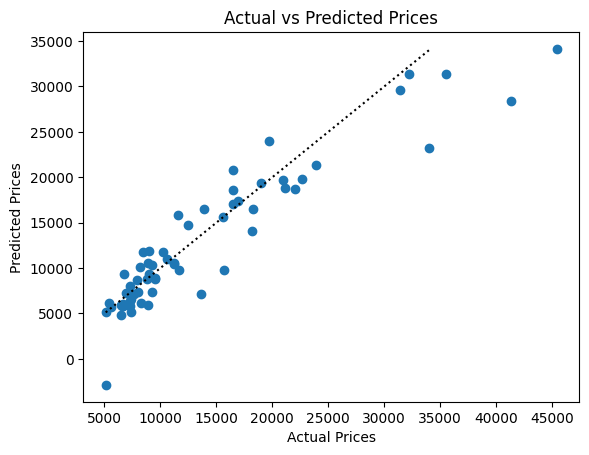

In [7]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(predictions)], [min(y_test), max(predictions)], 'k:')
plt.show()

## Depiction of change in MSE over iterations

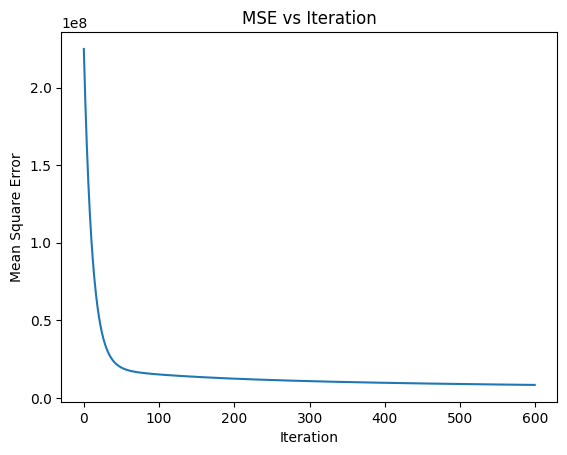

In [8]:
plt.plot(mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Iteration')
plt.show()

## Calculating R2 score

In [9]:

total_sum = np.sum((y_test - np.mean(y_test)) ** 2)
residual_sum = np.sum((y_test - predictions) ** 2)
r2 = 1 - (residual_sum/total_sum)
print(r2)

0.8480465742443195
